# Malaria Prediction Using KNN and Random Forest Algorithm
###                            BY
# SAIDU AGBUNSHU
## Matric No: ................

**This exercise is a solution that entails the prediction of Malaria in patients using KNN and Random Forest Algorithms**

***The solution comprises of the following key steps:***

## 1 : Data Aquisition, Loading and Exploratory Data Analysis: **skksvhskhj**
## 2 : Data Cleaning and Preprocessing
## 3: Training and Deployment of the machine learning models

## 1. IMPORTING RELEVANT LIBRARIES and  Loading the dataset

In [1]:
# Importing the libraries
#python get-pip.py for installing pip if not found
# dataframe and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load files into a pandas dataframe
data = pd.read_csv('malaria.csv')

# 2: EDA: Exploring the Data

### 2.1 Observing the shape of our datasets.

In [2]:
print('data shape :', data.shape)

data shape : (350, 9)


The above output shows the number of rows and columns for the malaria dataset. We have 9 variables in the  dataset comprising 8 independent variables and 1 dependent variable which is the target variable. 

In [3]:
# inspect train data
data.head()

,fever,cough,Sore_throat,weakness,vomiting,body_pain,headache,dizziness,status
0,0,1,0,1,0,1,1,1,0
1,1,0,0,1,1,1,1,0,1
2,0,1,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0
4,1,0,0,1,1,0,1,1,1


We can observe the first five rows from our data set by using as outlined above.


In [4]:
 #show some information about the dataset
 print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   fever        350 non-null    int64
 1   cough        350 non-null    int64
 2   Sore_throat  350 non-null    int64
 3   weakness     350 non-null    int64
 4   vomiting     350 non-null    int64
 5   body_pain    350 non-null    int64
 6   headache     350 non-null    int64
 7   dizziness    350 non-null    int64
 8   status       350 non-null    int64
dtypes: int64(9)
memory usage: 24.7 KB
None


**The output above shows the list of variables/features, sizes, if it contains missing values and data type for each variable. From the dataset, we don’t have any missing values and we have 3 features of integer data type and 10 features of the object data type.**

## Explore Target distribution 

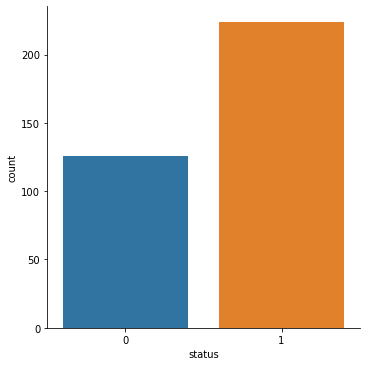

In [5]:
sns.catplot(x="status", kind="count", data=data)

# Check for missing values

In [6]:
# Check for missing values
print('missing values:', data.isnull().sum())

missing values: fever          0
cough          0
Sore_throat    0
weakness       0
vomiting       0
body_pain      0
headache       0
dizziness      0
status         0
dtype: int64


### 3. Data preparation for machine learning

**Before you train the model for prediction, you need to perform data cleaning and preprocessing. This is a very important step; your model will not perform well without these steps.**

***The first step is to separate the independent variables and dependent/target variable(status) from each other i bothe the the train and test data. Then transform the target values from the object data type into numerical by using LabelEncoder.***

In [7]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# CoNvert target label to numerical Data
le = LabelEncoder()
data['status'] = le.fit_transform(data['status'])

### Spliting the data set into trainig and test dat


In [8]:
# import modules
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = data
# get the locations of the target variable i.e. status which is the last column(located/identified by -1)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
 
# split the dataset to 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=0)

In [9]:
#Sample of the train dataset
#print("X_test", "y_train")
print(X_train.head())
print(y_train.head())

     fever  cough  Sore_throat  weakness  vomiting  body_pain  headache  \
166      0      0            0         0         1          1         1   
287      0      0            1         1         1          0         1   
141      1      0            0         0         1          0         0   
81       1      0            0         0         0          0         0   
1        1      0            0         1         1          1         1   

     dizziness  
166          1  
287          0  
141          1  
81           1  
1            0  
166    1
287    1
141    1
81     1
1      1
Name: status, dtype: int64


## Developing and deploying the Random Forest

In [10]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [13]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()

In [28]:
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.7047619047619048


In [15]:
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier

# Create a Random forest Classifier
clf = RandomForestClassifier(n_estimators = 100)
  
# Train the model using the training sets
clf.fit(X_train, y_train)
rf = clf 

In [16]:
## Prediction using the test dataset
y_pred = rf.predict(X_test)

## Random Forest Model Evaluation

In [25]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\n")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(cm)
print("\n")

precision = precision_score(y_test, y_pred)
print("precision Score: ",precision)
print("\n")

recall = recall_score(y_test, y_pred)
print("Recall: ",recall)
print("\n")

Accuracy: 0.7047619047619048


Confusion Matrix:

[[21 13]
 [18 53]]


precision Score:  0.803030303030303


Recall:  0.7464788732394366




In [26]:
#!pip install graphviz
#WARNING: You are using pip version 21.0.1; however, version 23.2.1 is available.
#You should consider upgrading via the 'c:\users\44777\anaconda3\python.exe -m pip install --upgrade pip' command.
#

### DEPLOYING THE KNN MODEL

In [16]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
    
knn = KNeighborsClassifier(n_neighbors=7)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
knn.predict(X_test)

# Calculate the accuracy of the model
print("KNN Accuracy = ",knn.score(X_test, y_test))

KNN Accuracy =  0.7238095238095238


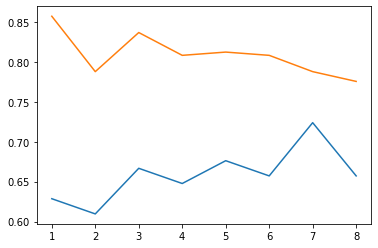

In [13]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')